# Assignment 2 -Propulsion Plants Decay Evaluation using propulsion.csv

Data contains compressor & turbine data from the propulsion system,we have to find the predicted columns for GT Compressor decay state coefficient & GT Turbine decay state coefficient.

# Solution Approach:

As we need to predict GT Compressor decay state coefficient & GT Turbine decay state coefficient which are continuous in nature,Linear Regression can be used for prediction

# Step 1 : Importing Libraries and Understanding Data

In [84]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import sklearn #This lib contains all the models
import statsmodels.api as sm #will help to display data in the form of statistics

%matplotlib inline
from IPython.display import HTML
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import LinearRegression

In [87]:
#Importing (propulsion.csv) data
propulsion = pd.read_csv('Downloads/propulsion.csv')

In [88]:
#Look at first five rows
propulsion.head()

,Unnamed: 0,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


# Lets check the Data type & Summary of the Data

In [89]:
print(propulsion.shape)
print(propulsion.describe())

(10000, 19)
        Unnamed: 0  Lever position (lp) [ ]  Ship speed (v) [knots]  \
count  10000.00000             10000.000000            10000.000000   
mean    4999.50000                 5.150075               14.951400   
std     2886.89568                 2.624015                7.740467   
min        0.00000                 1.138000                3.000000   
25%     2499.75000                 3.144000                9.000000   
50%     4999.50000                 5.140000               15.000000   
75%     7499.25000                 7.148000               21.000000   
max     9999.00000                 9.300000               27.000000   

       Gas Turbine shaft torque (GTT) [kN m]  \
count                           10000.000000   
mean                            27100.647714   
std                             22062.780307   
min                               253.547000   
25%                              8375.791500   
50%                             21630.133500   
75%         

In [90]:
propulsion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     10000 non-null  int64  
 1   Lever position (lp) [ ]                        10000 non-null  float64
 2   Ship speed (v) [knots]                         10000 non-null  float64
 3   Gas Turbine shaft torque (GTT) [kN m]          10000 non-null  float64
 4   Gas Turbine rate of revolutions (GTn) [rpm]    10000 non-null  float64
 5   Gas Generator rate of revolutions (GGn) [rpm]  10000 non-null  float64
 6   Starboard Propeller Torque (Ts) [kN]           10000 non-null  float64
 7   Port Propeller Torque (Tp) [kN]                10000 non-null  float64
 8   HP Turbine exit temperature (T48) [C]          10000 non-null  float64
 9   GT Compressor inlet air temperature (T1) [C]   1000

# Step 2: Visualising Data

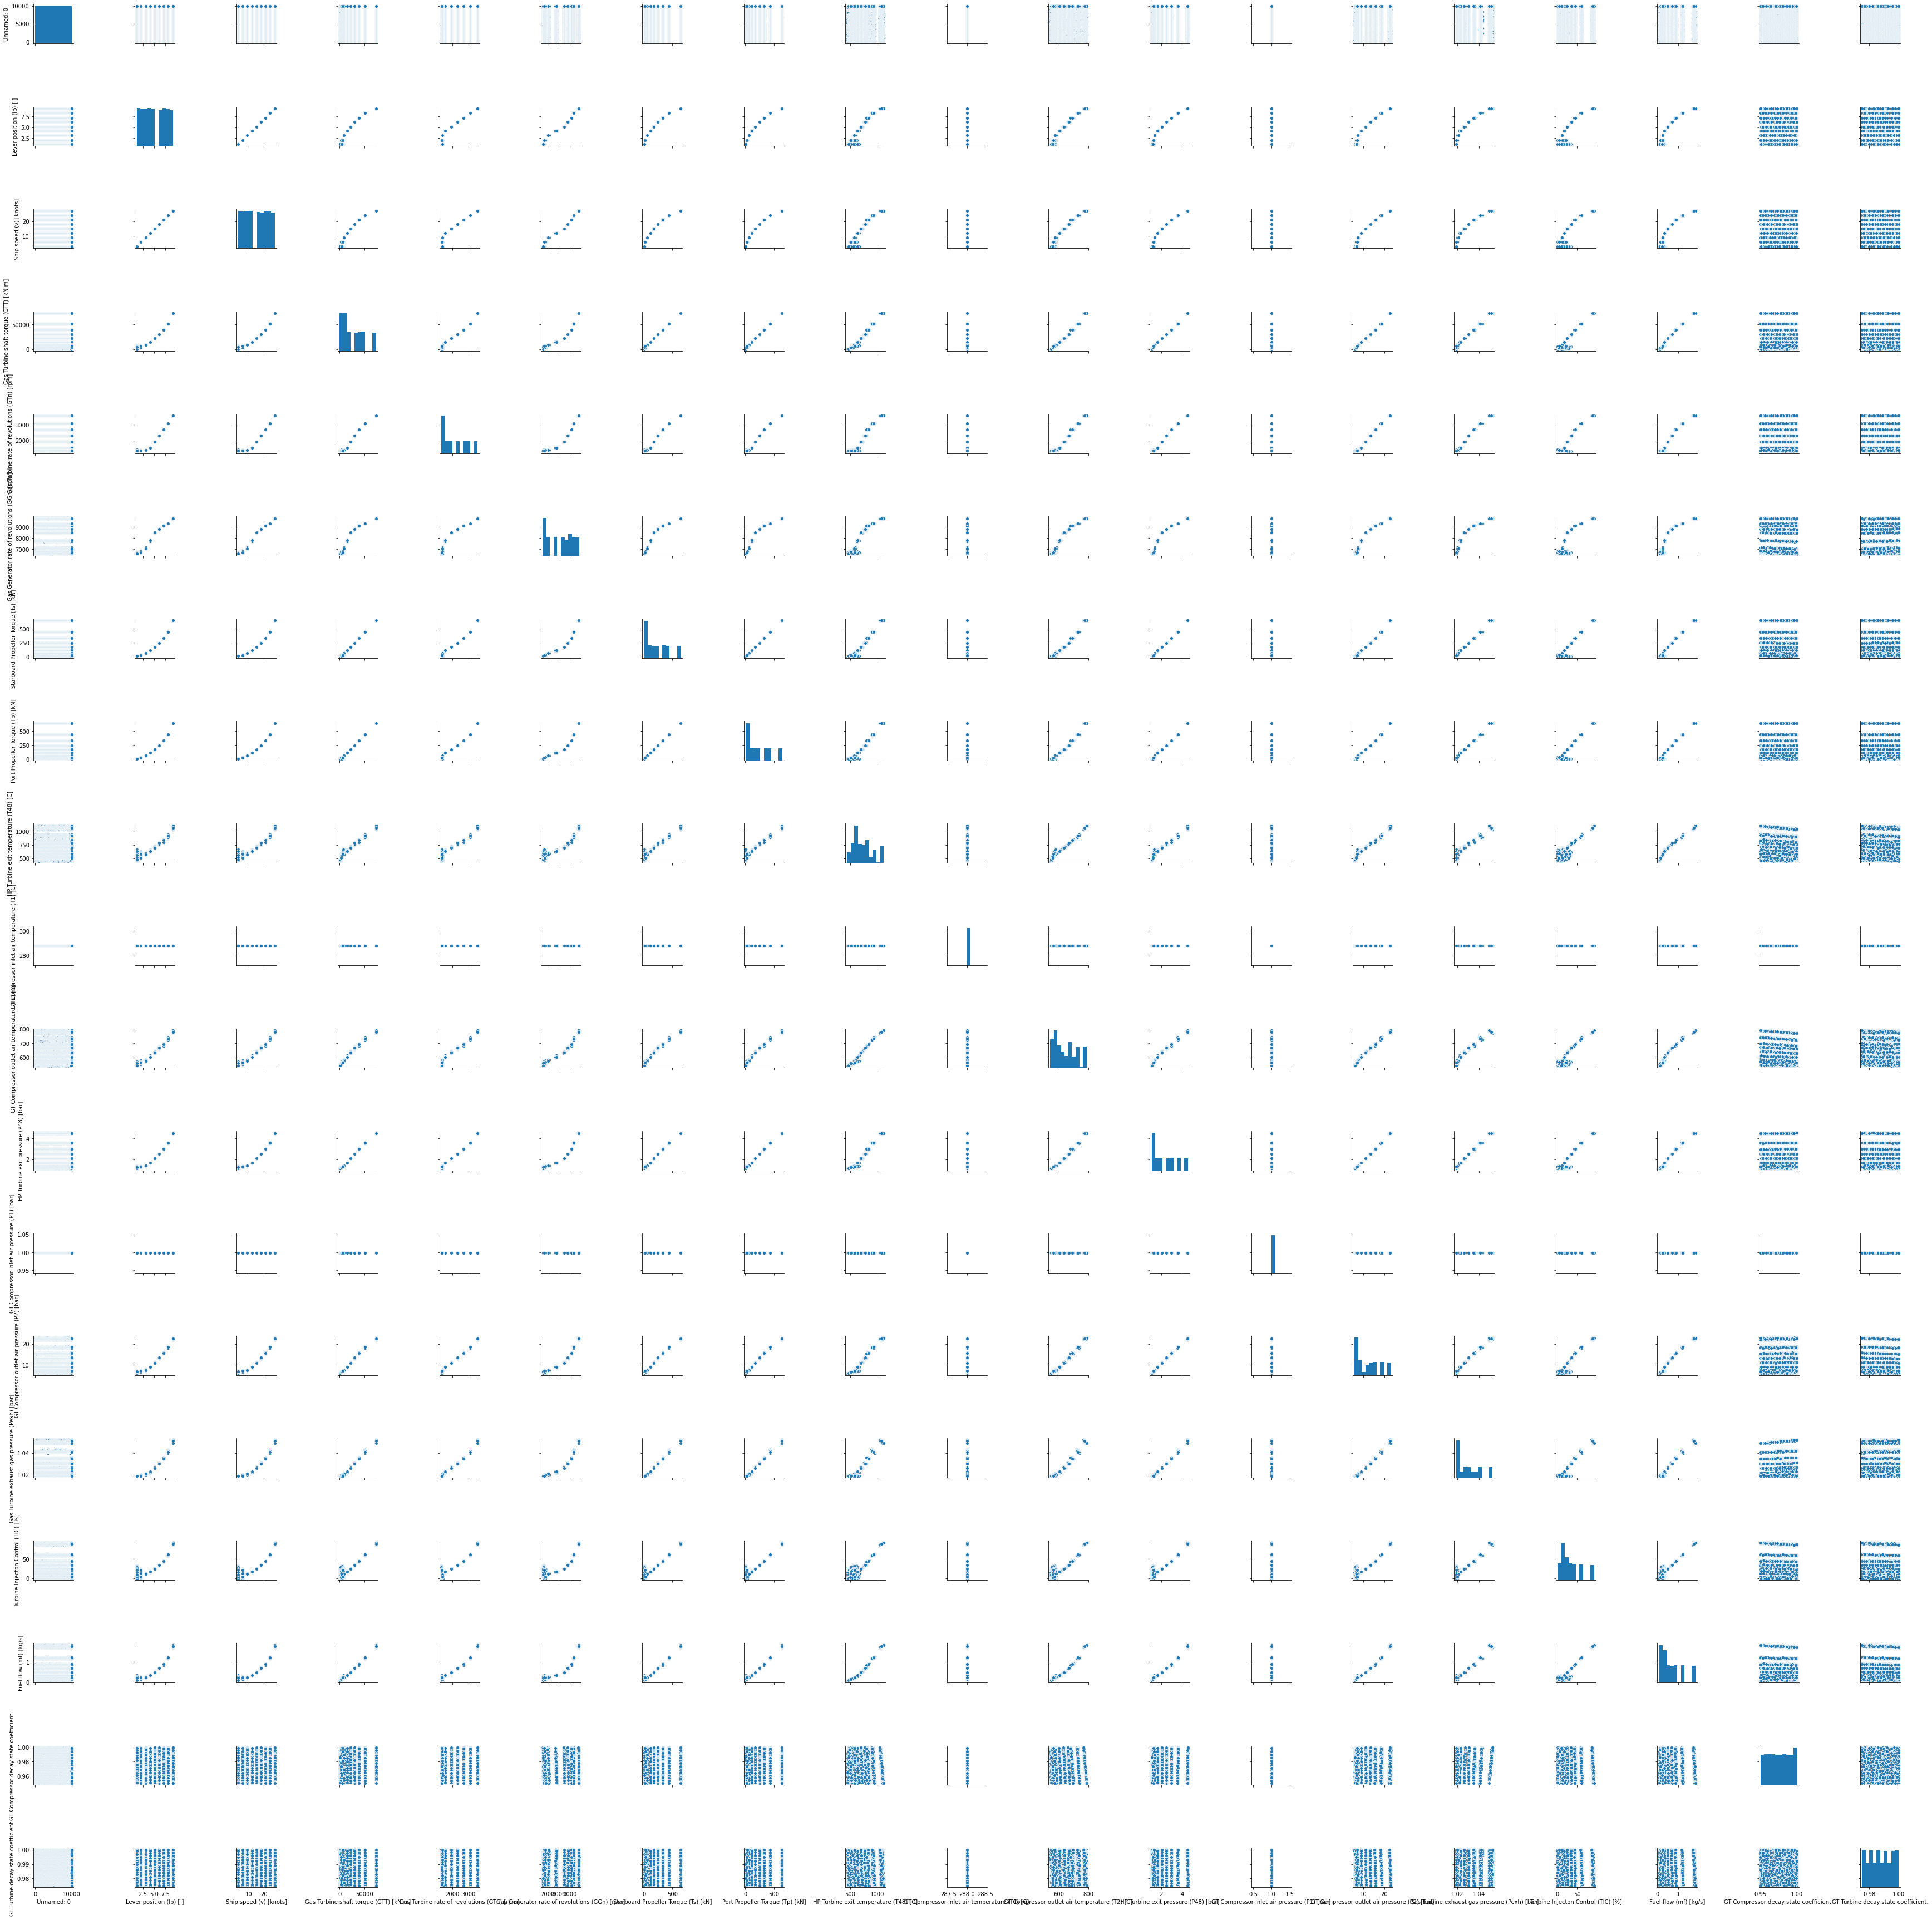

In [91]:
# Let's plot a pair plot of all numerical variables in our dataframe
sns.pairplot(propulsion)

C:\Users\Mush\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


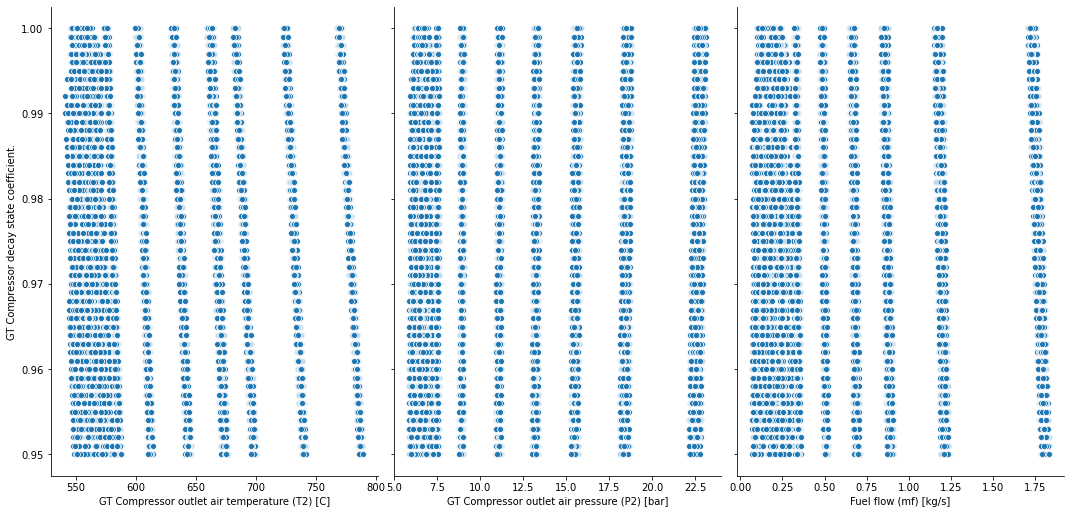

In [92]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(propulsion, x_vars=['GT Compressor outlet air temperature (T2) [C]','GT Compressor outlet air pressure (P2) [bar]','Fuel flow (mf) [kg/s]'], y_vars='GT Compressor decay state coefficient.',
             size=7, aspect=0.7, kind='scatter')

# Step 3: Exploratory data analysis

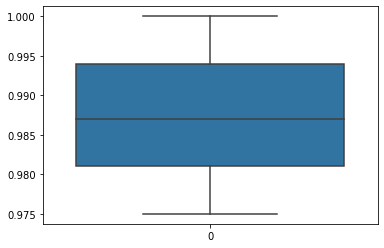

In [96]:
sns.boxplot(data=propulsion["GT Turbine decay state coefficient."])

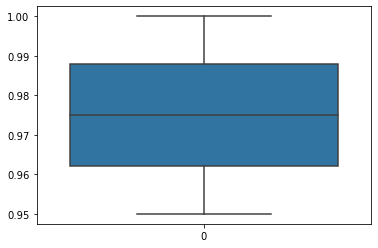

In [97]:
sns.boxplot(data=propulsion["GT Compressor decay state coefficient."])

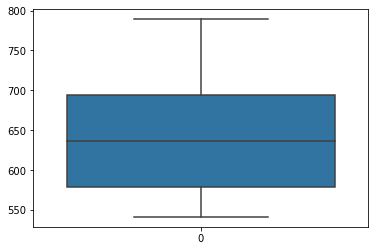

In [98]:
sns.boxplot(data=propulsion["GT Compressor outlet air temperature (T2) [C]"])

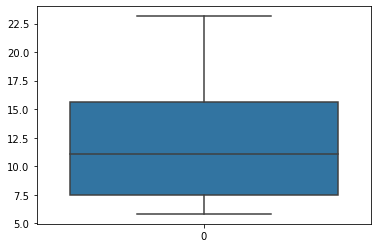

In [99]:
sns.boxplot(data=propulsion["GT Compressor outlet air pressure (P2) [bar]"])

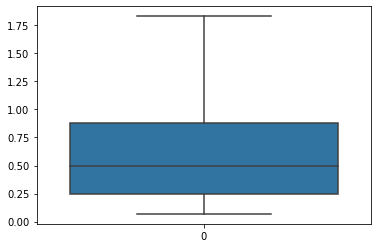

In [100]:
sns.boxplot(data=propulsion["Fuel flow (mf) [kg/s]"])

# Step 4 : Splitting the data in Training and Test set

In [101]:
#create X and Y
X = propulsion[['GT Compressor outlet air temperature (T2) [C]','GT Compressor outlet air pressure (P2) [bar]','Fuel flow (mf) [kg/s]']]
Y = propulsion['GT Compressor decay state coefficient.']

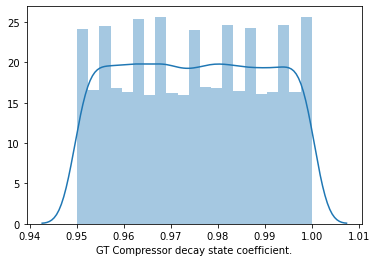

In [102]:
sns.distplot(Y,hist=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000272EDC747C8>,
      dtype=object)

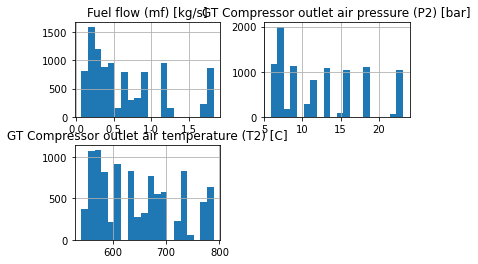

In [103]:
X.hist(bins=20)
#Chebyshev's principle

In [104]:
from scipy.stats import skew
propulsion_num_skew = X.apply(lambda x:skew(x.dropna()))
propulsion_num_skewed = propulsion_num_skew[(propulsion_num_skew > .75)| (propulsion_num_skew <-.75)]

print(propulsion_num_skew)
print(propulsion_num_skewed)
#import numpy as np
#apply log + 1 transformation for all numeric features with skewnes over .75
#X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

GT Compressor outlet air temperature (T2) [C]    0.433451
GT Compressor outlet air pressure (P2) [bar]     0.635649
Fuel flow (mf) [kg/s]                            1.009347
dtype: float64
Fuel flow (mf) [kg/s]    1.009347
dtype: float64


                                               GT Compressor outlet air temperature (T2) [C]  \
GT Compressor outlet air temperature (T2) [C]                                       1.000000   
GT Compressor outlet air pressure (P2) [bar]                                        0.994381   
Fuel flow (mf) [kg/s]                                                               0.976426   

                                               GT Compressor outlet air pressure (P2) [bar]  \
GT Compressor outlet air temperature (T2) [C]                                      0.994381   
GT Compressor outlet air pressure (P2) [bar]                                       1.000000   
Fuel flow (mf) [kg/s]                                                              0.989180   

                                               Fuel flow (mf) [kg/s]  
GT Compressor outlet air temperature (T2) [C]               0.976426  
GT Compressor outlet air pressure (P2) [bar]                0.989180  
Fuel flow (mf) [kg/s]

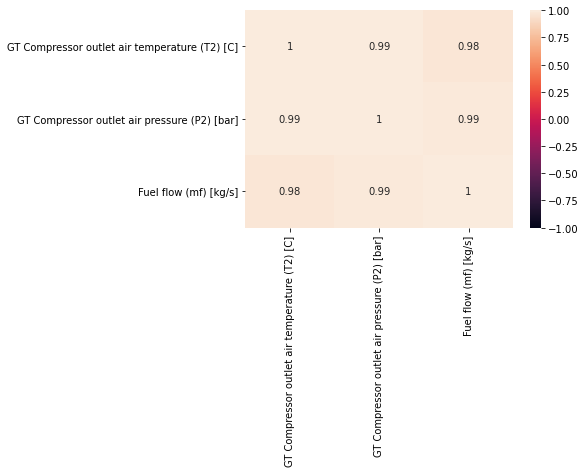

In [105]:
import seaborn as sns

corr_df=X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)


In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df['features']= X.columns
vif_df['VIF Factor'] = [vif(X.values,i)for i in range(X.shape[1])]
vif_df.round(2)


,features,VIF Factor
0,GT Compressor outlet air temperature (T2) [C],101.18
1,GT Compressor outlet air pressure (P2) [bar],427.89
2,Fuel flow (mf) [kg/s],137.70


In [107]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=10)

In [108]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

#print intercept an coefficients
print(lm.intercept_)
print(lm.coef_)

1.623040680604697
[-0.00145432  0.02910604 -0.09993668]


In [109]:
#pair the feature names with the coefficients
print(list(zip(X.columns,lm.coef_)))

[('GT Compressor outlet air temperature (T2) [C]', -0.0014543207560045988), ('GT Compressor outlet air pressure (P2) [bar]', 0.02910604254163695), ('Fuel flow (mf) [kg/s]', -0.09993668379680423)]


In [110]:
X1 = 100
X2 = 100
X3 = 100
y_preda = 1.623040680604697+(-0.00145432 *X1) +(0.02910604 *X2)+(-0.09993668 *X3)
print(y_preda)

-5.605455319395302


In [111]:
print(X_test)

      GT Compressor outlet air temperature (T2) [C]  \
937                                         662.651   
9355                                        732.425   
2293                                        605.565   
192                                         576.226   
8675                                        688.043   
...                                             ...   
5624                                        726.151   
6005                                        732.145   
987                                         779.951   
6152                                        673.333   
2092                                        600.457   

      GT Compressor outlet air pressure (P2) [bar]  Fuel flow (mf) [kg/s]  
937                                         13.083                  0.655  
9355                                        18.458                  1.195  
2293                                         8.926                  0.338  
192                                

# Step 6 : Predictions

In [112]:
Y_pred = lm.predict(X_test)
print(Y_pred)

[0.9746694  0.9756748  0.96837687 ... 0.97604681 0.96060882 0.97488879]


In [113]:
new_df = pd.DataFrame()
new_df = X_test 

new_df["Actual GT Compressor decay state coefficient."]=Y_test
new_df['Predicted GT Compressor decay state coefficient.']=Y_pred
print(new_df)

      GT Compressor outlet air temperature (T2) [C]  \
937                                         662.651   
9355                                        732.425   
2293                                        605.565   
192                                         576.226   
8675                                        688.043   
...                                             ...   
5624                                        726.151   
6005                                        732.145   
987                                         779.951   
6152                                        673.333   
2092                                        600.457   

      GT Compressor outlet air pressure (P2) [bar]  Fuel flow (mf) [kg/s]  \
937                                         13.083                  0.655   
9355                                        18.458                  1.195   
2293                                         8.926                  0.338   
192                            

C:\Users\Mush\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mush\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# Step 6 : Model Performance Metrics

In [115]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)

In [116]:
from math import sqrt
rmse = sqrt(mse)

In [117]:
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.00011898110558014282
Root_Mean_Squared_Error : 0.010907846055942612
r_square_value : 0.4540732956610499


# Statistical output

In [119]:
import statsmodels.api as sm
X_train_sm = X_train

#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)

# create a fitted model in one line
lm_1 = sm.OLS(Y_train,X_train_sm).fit()

# print the coefficients
lm_1.params

const                                            1.623041
GT Compressor outlet air temperature (T2) [C]   -0.001454
GT Compressor outlet air pressure (P2) [bar]     0.029106
Fuel flow (mf) [kg/s]                           -0.099937
dtype: float64

In [120]:
print(lm_1.summary())

                                      OLS Regression Results                                      
Dep. Variable:     GT Compressor decay state coefficient.   R-squared:                       0.479
Model:                                                OLS   Adj. R-squared:                  0.479
Method:                                     Least Squares   F-statistic:                     2448.
Date:                                    Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                                            21:30:46   Log-Likelihood:                 25000.
No. Observations:                                    8000   AIC:                        -4.999e+04
Df Residuals:                                        7996   BIC:                        -4.996e+04
Df Model:                                               3                                         
Covariance Type:                                nonrobust                                         
          

# Now lets find for GT Turbine decay state coefficient.

# Similar steps from 3,4,5,6

In [121]:
#create X and Y
X = propulsion[['GT Compressor outlet air temperature (T2) [C]','GT Compressor outlet air pressure (P2) [bar]','Fuel flow (mf) [kg/s]']]
Y = propulsion['GT Turbine decay state coefficient.']

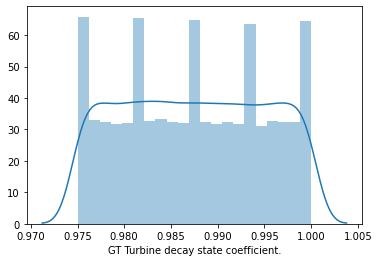

In [122]:
sns.distplot(Y,hist=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000272EDE81DC8>,
      dtype=object)

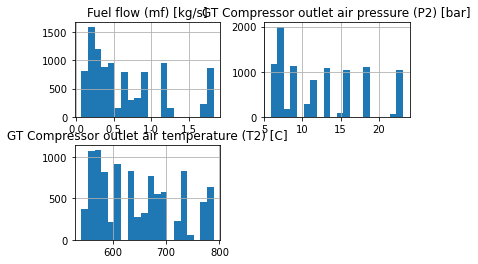

In [123]:
X.hist(bins=20)
#Chebyshev's principle

                                               GT Compressor outlet air temperature (T2) [C]  \
GT Compressor outlet air temperature (T2) [C]                                       1.000000   
GT Compressor outlet air pressure (P2) [bar]                                        0.994381   
Fuel flow (mf) [kg/s]                                                               0.976426   

                                               GT Compressor outlet air pressure (P2) [bar]  \
GT Compressor outlet air temperature (T2) [C]                                      0.994381   
GT Compressor outlet air pressure (P2) [bar]                                       1.000000   
Fuel flow (mf) [kg/s]                                                              0.989180   

                                               Fuel flow (mf) [kg/s]  
GT Compressor outlet air temperature (T2) [C]               0.976426  
GT Compressor outlet air pressure (P2) [bar]                0.989180  
Fuel flow (mf) [kg/s]

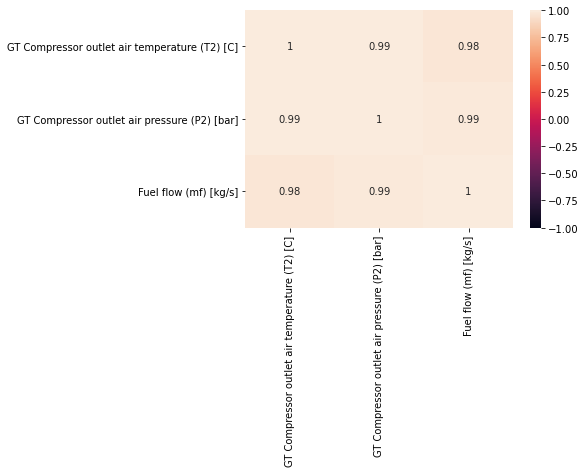

In [124]:
import seaborn as sns

corr_df=X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)


In [125]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=10)

In [126]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

#print intercept an coefficients
print(lm.intercept_)
print(lm.coef_)

0.9811028908201898
[ 1.49012727e-05 -3.11571242e-04  8.77455198e-04]


In [127]:
#pair the feature names with the coefficients
print(list(zip(X.columns,lm.coef_)))

[('GT Compressor outlet air temperature (T2) [C]', 1.4901272663872131e-05), ('GT Compressor outlet air pressure (P2) [bar]', -0.00031157124165808874), ('Fuel flow (mf) [kg/s]', 0.0008774551984621716)]


In [128]:
X1 = 100
X2 = 100
X3 = 100
y_preda = 0.9811028908201898 +(1.49012727e-05 *X1) +(-3.11571242e-04 *X2)+(8.77455198e-04 *X3)
print(y_preda)

1.0391814136901898


In [129]:
print(X_test)

      GT Compressor outlet air temperature (T2) [C]  \
937                                         662.651   
9355                                        732.425   
2293                                        605.565   
192                                         576.226   
8675                                        688.043   
...                                             ...   
5624                                        726.151   
6005                                        732.145   
987                                         779.951   
6152                                        673.333   
2092                                        600.457   

      GT Compressor outlet air pressure (P2) [bar]  Fuel flow (mf) [kg/s]  
937                                         13.083                  0.655  
9355                                        18.458                  1.195  
2293                                         8.926                  0.338  
192                                

In [130]:
Y_pred = lm.predict(X_test)
print(Y_pred)

[0.98747568 0.98731453 0.98764207 ... 0.98716461 0.98761138 0.98757866]


In [131]:
new_df = pd.DataFrame()
new_df = X_test 

new_df["Actual GT Turbine decay state coefficient."]=Y_test
new_df['Predicted GT Turbine decay state coefficient.']=Y_pred
print(new_df)

      GT Compressor outlet air temperature (T2) [C]  \
937                                         662.651   
9355                                        732.425   
2293                                        605.565   
192                                         576.226   
8675                                        688.043   
...                                             ...   
5624                                        726.151   
6005                                        732.145   
987                                         779.951   
6152                                        673.333   
2092                                        600.457   

      GT Compressor outlet air pressure (P2) [bar]  Fuel flow (mf) [kg/s]  \
937                                         13.083                  0.655   
9355                                        18.458                  1.195   
2293                                         8.926                  0.338   
192                            

C:\Users\Mush\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mush\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [132]:
import statsmodels.api as sm
X_train_sm = X_train

#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)

# create a fitted model in one line
lm_1 = sm.OLS(Y_train,X_train_sm).fit()

# print the coefficients
lm_1.params

const                                            0.981103
GT Compressor outlet air temperature (T2) [C]    0.000015
GT Compressor outlet air pressure (P2) [bar]    -0.000312
Fuel flow (mf) [kg/s]                            0.000877
dtype: float64

In [133]:
print(lm_1.summary())

                                     OLS Regression Results                                    
Dep. Variable:     GT Turbine decay state coefficient.   R-squared:                       0.001
Model:                                             OLS   Adj. R-squared:                  0.000
Method:                                  Least Squares   F-statistic:                     1.499
Date:                                 Fri, 20 Nov 2020   Prob (F-statistic):              0.213
Time:                                         21:33:16   Log-Likelihood:                 27778.
No. Observations:                                 8000   AIC:                        -5.555e+04
Df Residuals:                                     7996   BIC:                        -5.552e+04
Df Model:                                            3                                         
Covariance Type:                             nonrobust                                         
                                        